<a href="https://colab.research.google.com/github/rafaelherbster/TelecomX/blob/main/TelecomX_Desafio_Alura(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
## Telecom X - Análise de Evasão de Clientes
Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

##Objetivo
 Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão

## Limpeza e Tratamento de dados
 - Carregamento de bibliotecas
 - Leitura do conjunto de dados
 - Normalização dos dados
 - Renomeando variaveis
 - Informações iniciais
 - Verificando inconsistencias nos dados

In [24]:
# @title Carregamento de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from IPython.display import Markdown
import math

In [25]:
# @title Leitura dos dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

In [26]:
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [27]:
# @title Normalização dos dados
df = pd.json_normalize(
    data,
    sep = '_'
)
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [28]:
# @title Renomeando variaveis
df = df.rename(columns={
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',

})

In [29]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Últimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Últimas linhas

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Quantidade de valores únicos

,0
customerID,7267
Churn,3
Gender,2
SeniorCitizen,2
Partner,2
Dependents,2
Tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


###Verificando inconsistencia nos dados

In [30]:
# @title Verificando variaveis qualitativas
display(Markdown("## Informações sobre variáveis qualitativas"))
for col in df.select_dtypes(include=['object']).columns[:]:
    print(f'{col}: {df[col].unique()}')

display(Markdown("## Tratando inconsistencias"))
display(Markdown("### Trantando dados da coluna Churn: substituindo ' ' por Unknow"))
df['Churn'] = df['Churn'].replace('', 'Unknow')
print(f'Churn: {df["Churn"].unique()}')

display(Markdown("### Tratando dados da coluna TotalCharges: Coerção do tipo object para float64"))
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f'TotalCharges: {df["TotalCharges"].dtype}')

## Informações sobre variáveis qualitativas

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
Gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
TotalCharges: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


## Tratando inconsistencias

### Trantando dados da coluna Churn: substituindo ' ' por Unknow

Churn: ['No' 'Yes' 'Unknow']


### Tratando dados da coluna TotalCharges: Coerção do tipo object para float64

TotalCharges: float64


In [31]:
# @title Verificando variaveis quantitativas
display(Markdown("## Informações sobre variáveis quantitativas"))
for col in df.select_dtypes(exclude=['object']).columns[:]:
    print(f'{col}: {df[col].unique()}')

display(Markdown("## Tratando inconsistencias"))
display(Markdown("### Tratando os dados da coluna SeniorCitizen: Padronizando valores binários"))
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
print(f"SeniorCitizen: {df['SeniorCitizen'].unique()}")

## Informações sobre variáveis quantitativas

SeniorCitizen: [0 1]
Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
MonthlyCharges: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
TotalCharges: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


## Tratando inconsistencias

### Tratando os dados da coluna SeniorCitizen: Padronizando valores binários

SeniorCitizen: ['No' 'Yes']


In [32]:
# @title Adicionando a coluna DailyCharges
df['DailyCharges'] = (df['TotalCharges'] / (df['Tenure'] * 30)).round(2)
print(f"DailyCharges: \n{df['DailyCharges'].head()}")

DailyCharges: 
0    2.20
1    2.01
2    2.34
3    3.17
4    2.97
Name: DailyCharges, dtype: float64


In [33]:
# @title Removendo dados 'Unknow' do DataFrame
display(Markdown("### Vamos criar um novo DataFrame somente com valores válidos para variavel Churn"))
display(Markdown("#### Removendo todas as linhas com valores 'Unknow' em qualquer coluna"))
df_valid = df[~df.isin(['Unknow']).any(axis=1)].reset_index(drop=True)
print(f"Número de linhas após limpeza: {df_valid.shape[0]}")

### Vamos criar um novo DataFrame somente com valores válidos para variavel Churn

#### Removendo todas as linhas com valores 'Unknow' em qualquer coluna

Número de linhas após limpeza: 7043


## Características do Dataset

---
A partir das informações iniciais, podemos dizer que:  
- O conjunto de dados tem 7043 unidades amostrais com 22 variáveis  
- Classificação das variáveis:
  - Quantitativa contínua: `DailyCharges`,`MonthlyCharges`, `TotalCharges`
  - Quantitativa discreta: `Tenure`
  - Qualitativa nominal: `customerID`, `Churn`, `Gender`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaymentMethod`
  - Qualitativa ordinal: `Contract`
  - Qualitativa binária: `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`

---

In [131]:
# @title Dicionário de Dados

df_dict = pd.DataFrame(
    [
        {'variavel': 'customerID', 'descricao': 'identificador único do cliente', 'tipo': 'qualitativa', 'subtipo': 'nominal','categoria': 'perfil do usuario' },
        {'variavel': 'Churn', 'descricao': 'indica se o cliente cancelou o serviço', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'perfil do usuario'},
        {'variavel': 'Gender', 'descricao': 'gênero do cliente', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'perfil do usuario'},
        {'variavel': 'SeniorCitizen', 'descricao': 'indica se o cliente é idoso', 'tipo': 'qualitativa', 'subtipo': 'binária', 'categoria': 'perfil do usuario'},
        {'variavel': 'Partner', 'descricao': 'indica se o cliente tem parceiro(a)', 'tipo': 'qualitativa', 'subtipo': 'binária', 'categoria': 'perfil do usuario'},
        {'variavel': 'Dependents', 'descricao': 'indica se o cliente possui dependentes', 'tipo': 'qualitativa', 'subtipo': 'binária', 'categoria': 'perfil do usuario'},
        {'variavel': 'Tenure', 'descricao': 'tempo (em meses) como cliente da empresa', 'tipo': 'quantitativa', 'subtipo': 'contínua', 'categoria': 'perfil do usuario'},
        {'variavel': 'PhoneService', 'descricao': 'indica se o cliente possui serviço telefônico', 'tipo': 'qualitativa', 'subtipo': 'binária', 'categoria': 'serviço'},
        {'variavel': 'MultipleLines', 'descricao': 'possui múltiplas linhas telefônicas', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'InternetService', 'descricao': 'tipo de serviço de internet contratado', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'OnlineSecurity', 'descricao': 'possui segurança online', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'OnlineBackup', 'descricao': 'possui backup online', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'DeviceProtection', 'descricao': 'possui proteção de dispositivo', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'TechSupport', 'descricao': 'possui suporte técnico', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'StreamingTV', 'descricao': 'possui serviço de TV por streaming', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'StreamingMovies', 'descricao': 'possui serviço de filmes por streaming', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'serviço'},
        {'variavel': 'Contract', 'descricao': 'tipo de contrato do cliente', 'tipo': 'qualitativa', 'subtipo': 'ordinal', 'categoria': 'financeiro'},
        {'variavel': 'PaperlessBilling', 'descricao': 'fatura enviada eletronicamente', 'tipo': 'qualitativa', 'subtipo': 'binária', 'categoria': 'financeiro'},
        {'variavel': 'PaymentMethod', 'descricao': 'método de pagamento utilizado', 'tipo': 'qualitativa', 'subtipo': 'nominal', 'categoria': 'financeiro'},
        {'variavel': 'DailyCharges', 'descricao': 'valor diario cobrado do cliente', 'tipo': 'quantitativa', 'subtipo': 'contínua', 'categoria': 'financeiro'},
        {'variavel': 'MonthlyCharges', 'descricao': 'valor mensal cobrado do cliente', 'tipo': 'quantitativa', 'subtipo': 'contínua', 'categoria': 'financeiro'},
        {'variavel': 'TotalCharges', 'descricao': 'valor total pago pelo cliente', 'tipo': 'quantitativa', 'subtipo': 'contínua', 'categoria': 'financeiro'}
    ]
)
df_dict


,variavel,descricao,tipo,subtipo,categoria
0,customerID,identificador único do cliente,qualitativa,nominal,perfil do usuario
1,Churn,indica se o cliente cancelou o serviço,qualitativa,nominal,perfil do usuario
2,Gender,gênero do cliente,qualitativa,nominal,perfil do usuario
3,SeniorCitizen,indica se o cliente é idoso,qualitativa,binária,perfil do usuario
4,Partner,indica se o cliente tem parceiro(a),qualitativa,binária,perfil do usuario
5,Dependents,indica se o cliente possui dependentes,qualitativa,binária,perfil do usuario
6,Tenure,tempo (em meses) como cliente da empresa,quantitativa,contínua,perfil do usuario
7,PhoneService,indica se o cliente possui serviço telefônico,qualitativa,binária,serviço
8,MultipleLines,possui múltiplas linhas telefônicas,qualitativa,nominal,serviço
9,InternetService,tipo de serviço de internet contratado,qualitativa,nominal,serviço


##Analise Exploratória

In [34]:
# @title Estatística Descritiva
display(Markdown("### Variáveis qualitativas"))
print(df_valid.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df_valid.describe())

### Variáveis qualitativas

        customerID Churn Gender SeniorCitizen Partner Dependents PhoneService  \
count         7043  7043   7043          7043    7043       7043         7043   
unique        7043     2      2             2       2          2            2   
top     9995-HOTOH    No   Male            No      No         No          Yes   
freq             1  5174   3555          5901    3641       4933         6361   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7043            7043           7043         7043   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3390            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No     

### Variáveis quantitativas

            Tenure  MonthlyCharges  TotalCharges  DailyCharges
count  7043.000000     7043.000000   7032.000000   7032.000000
mean     32.371149       64.761692   2283.300441      2.159878
std      24.559481       30.090047   2266.771362      1.006210
min       0.000000       18.250000     18.800000      0.460000
25%       9.000000       35.500000    401.450000      1.207500
50%      29.000000       70.350000   1397.475000      2.350000
75%      55.000000       89.850000   3794.737500      3.010000
max      72.000000      118.750000   8684.800000      4.050000


##Distribuição das variaveis

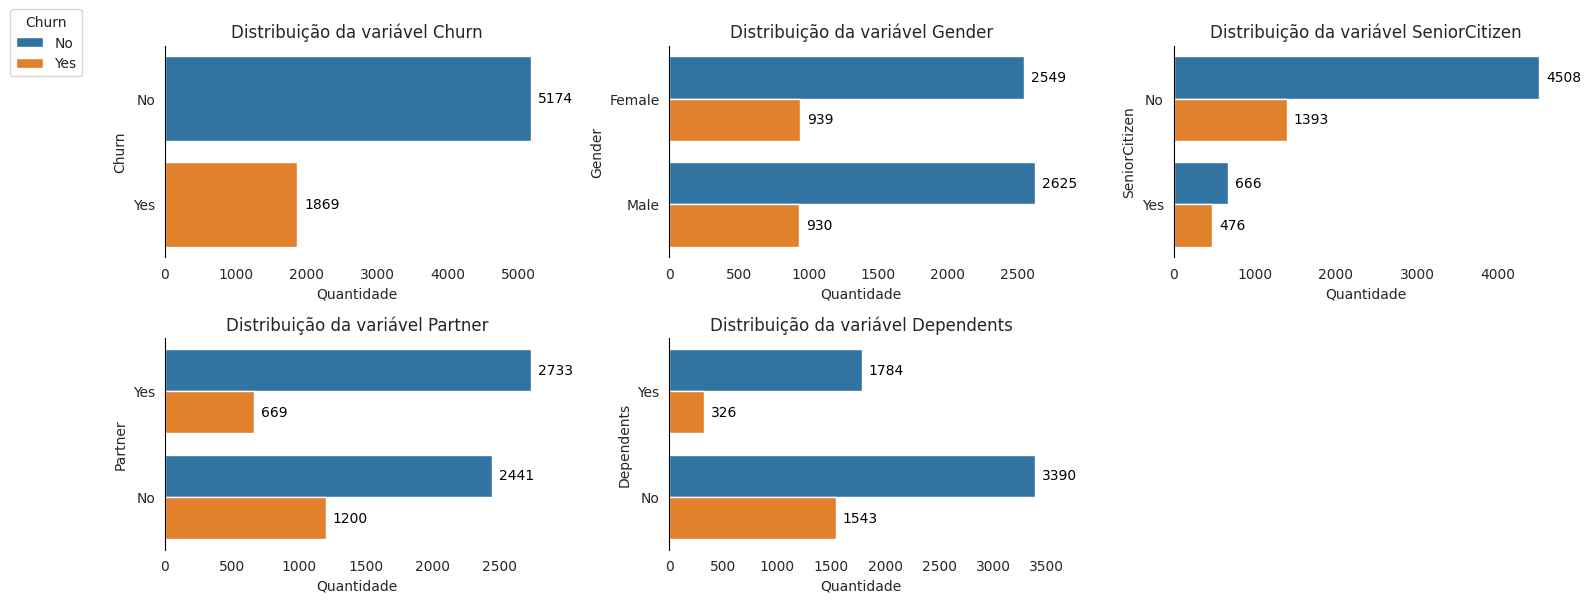

## Índices importantes sobre Churn nesta Categoria:

,Churn,Gender,SeniorCitizen,Partner,Dependents,Percentual
0,Yes,Female,No,No,No,22.95
1,Yes,Male,No,No,No,22.36
2,Yes,Female,Yes,No,No,8.45
3,Yes,Male,No,Yes,No,6.85
4,Yes,Female,No,Yes,Yes,6.63


In [121]:
# @title Variáveis qualitativas (perfil do usuario)

# Filtrar variáveis qualitativas (perfil do usuario)
variaveis_qualitativas_user = df_dict.query("tipo == 'qualitativa' and categoria == 'perfil do usuario'").variavel.to_list()

# Remover 'customerID' (pois é um identificador, não faz sentido analisar graficamente)
variaveis_qualitativas_user = [
    v for v in variaveis_qualitativas_user if v != 'customerID'
]

# Criar subplots dinâmicos com base no número de variáveis
n = len(variaveis_qualitativas_user)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(figsize=(ncols * 5, nrows * 3), ncols=ncols, nrows=nrows)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas_user):
    ax = axes[i]
    sns.countplot(data=df_valid, y=variavel, ax=ax, alpha=1, hue='Churn', legend=False)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.bar_label(ax.containers[1], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")


# Remover eixos não usados (caso sobre espaço)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.legend(bbox_to_anchor=(-0.01, 1), borderaxespad=0.1, title='Churn', labels=['No','Yes'])
plt.show()

display(Markdown("## Índices importantes sobre Churn nesta Categoria:"))

churn_rate_df = (
    df_valid
    .loc[df_valid['Churn'] == 'Yes']
    .groupby('Churn')[variaveis_qualitativas_user]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(name='Percentual')
    .sort_values(by='Percentual', ascending=False)

)
display(churn_rate_df[:5].reset_index(drop=True))


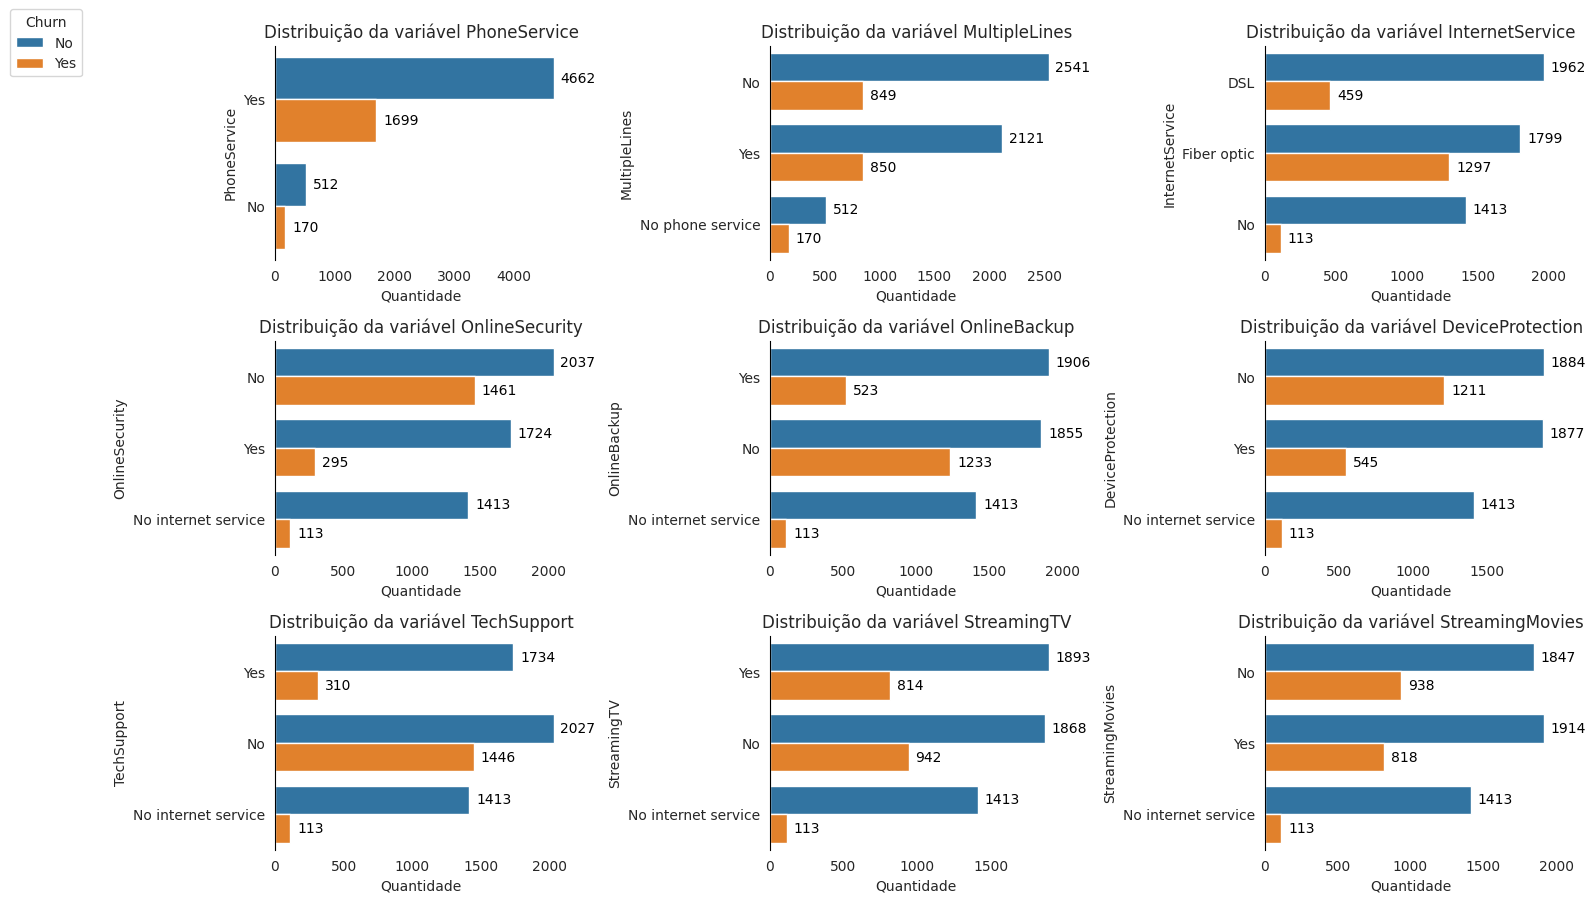

## Índices importantes sobre Churn nesta Categoria:

,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Percentual
0,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,7.38
1,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,5.51
2,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,No,5.51
3,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,3.91
4,Yes,Yes,No,DSL,No,No,No,No,No,No,3.75


In [122]:
# @title Variáveis qualitativas (serviços)

#Filtrando variaveis qualitativas (serviços)
variaveis_qualitativas_servicos = df_dict.query("tipo == 'qualitativa' and categoria == 'serviço'").variavel.to_list()

# Criar subplots dinâmicos com base no número de variáveis
n = len(variaveis_qualitativas_servicos)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(figsize=(ncols * 5, nrows * 3), ncols=ncols, nrows=nrows)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas_servicos):
    ax = axes[i]
    sns.countplot(data=df_valid, y=variavel, ax=ax, alpha=1, hue='Churn', legend=False)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.bar_label(ax.containers[1], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")


# Remover eixos não usados (caso sobre espaço)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.legend(bbox_to_anchor=(-0.01, 1), borderaxespad=0.1, title='Churn', labels=['No','Yes'])
plt.show()

display(Markdown("## Índices importantes sobre Churn nesta Categoria:"))

churn_rate_df = (
    df_valid
    .loc[df_valid['Churn'] == 'Yes']
    .groupby('Churn')[variaveis_qualitativas_servicos]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(name='Percentual')
    .sort_values(by='Percentual', ascending=False)

)
display(churn_rate_df[:5].reset_index(drop=True))

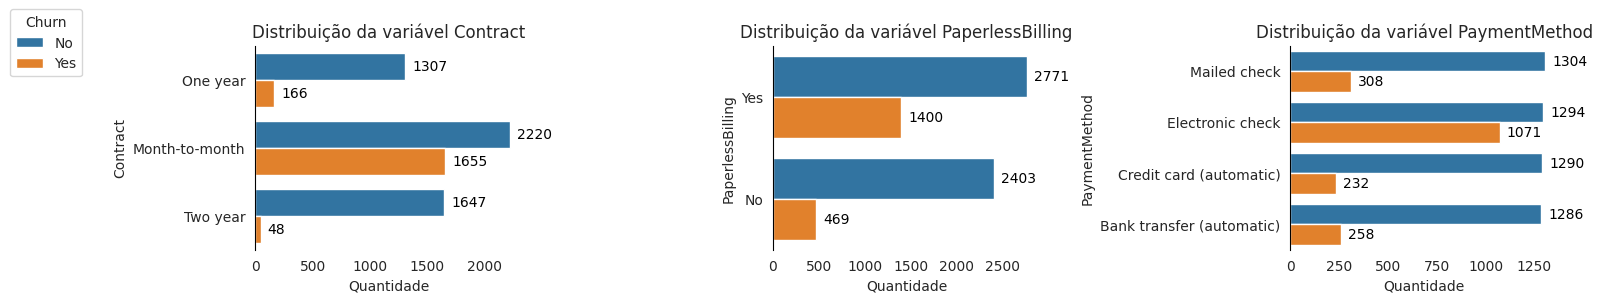

## Índices importantes sobre Churn nesta Categoria:

,Churn,Contract,PaperlessBilling,PaymentMethod,Percentual
0,Yes,Month-to-month,Yes,Electronic check,43.12
1,Yes,Month-to-month,No,Electronic check,10.06
2,Yes,Month-to-month,Yes,Mailed check,8.77
3,Yes,Month-to-month,Yes,Bank transfer (automatic),7.81
4,Yes,Month-to-month,Yes,Credit card (automatic),7.12


In [123]:
# @title Variáveis qualitativas (financeiro)

#Filtrando variaveis qualitativas (financeiro)
variaveis_qualitativas_financeiro = df_dict.query("tipo == 'qualitativa' and categoria == 'financeiro'").variavel.to_list()

# Criar subplots dinâmicos com base no número de variáveis
n = len(variaveis_qualitativas_financeiro)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(figsize=(ncols * 5, nrows * 3), ncols=ncols, nrows=nrows)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas_financeiro):
    ax = axes[i]
    sns.countplot(data=df_valid, y=variavel, ax=ax, alpha=1, hue='Churn', legend=False)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.bar_label(ax.containers[1], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")


# Remover eixos não usados (caso sobre espaço)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.legend(bbox_to_anchor=(-0.01, 1), borderaxespad=0.1, title='Churn', labels=['No','Yes'])
plt.show()

display(Markdown("## Índices importantes sobre Churn nesta Categoria:"))

churn_rate_df = (
    df_valid
    .loc[df_valid['Churn'] == 'Yes']
    .groupby('Churn')[variaveis_qualitativas_financeiro]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(name='Percentual')
    .sort_values(by='Percentual', ascending=False)

)
display(churn_rate_df[:5].reset_index(drop=True))

In [140]:
# @title Variáveis qualitativas consolidadas

#Filtrando variaveis qualitativas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()
variaveis_qualitativas = [v for v in variaveis_qualitativas if v != 'customerID']

display(Markdown("## Índices importantes sobre Churn entre as variaveis qualitativas:"))

churn_rate_df = (
    df_valid
    .loc[df_valid['Churn'] == 'Yes']
    .groupby('Churn')[variaveis_qualitativas]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(name='Percentual')
    .sort_values(by='Percentual', ascending=False)

)
display(churn_rate_df[:5].reset_index(drop=True))

## Índices importantes sobre Churn entre as variaveis qualitativas:

,Churn,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Percentual
0,Yes,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.96
1,Yes,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.91
2,Yes,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.75
3,Yes,Female,Yes,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.75
4,Yes,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.70


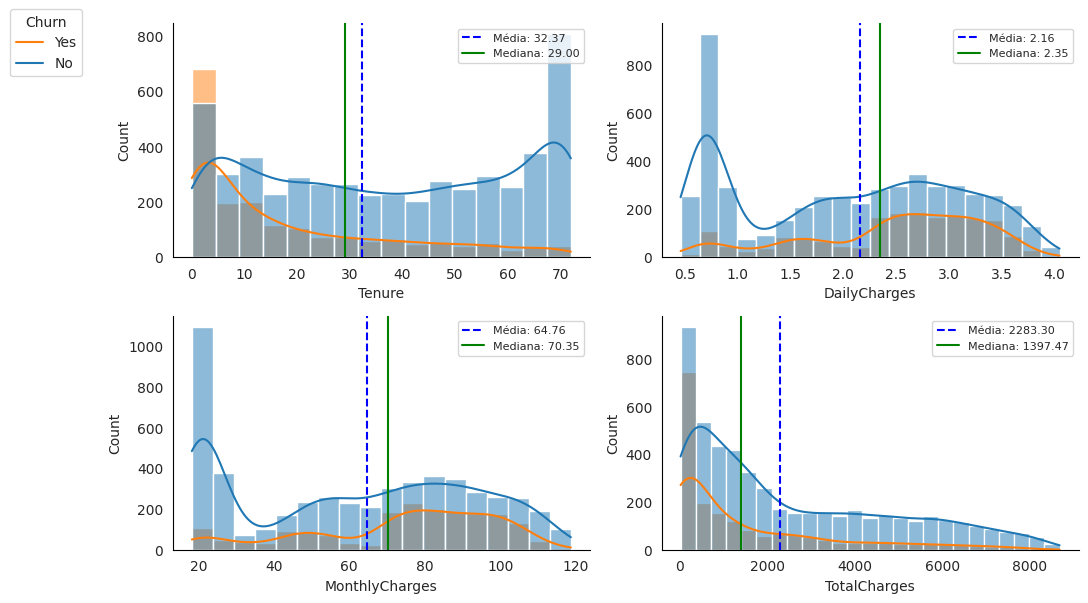

## Índices importantes sobre Churn nesta Categoria:

,mean,median,std,min,max
Tenure,17.98,10.00,19.53,1.00,72.00
DailyCharges,2.48,2.64,0.83,0.47,4.05
MonthlyCharges,74.44,79.65,24.67,18.85,118.35
TotalCharges,1531.80,703.55,1890.82,18.85,8684.80


In [133]:
# @title Variáveis quantitativas

# Filtrar variáveis quantitativas
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

# Remover 'customerID' (pois é um identificador, não faz sentido analisar graficamente)
variaveis_quantitativas = [v for v in variaveis_quantitativas]

# Criar subplots dinâmicos com base no número de variáveis
n = len(variaveis_quantitativas)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(figsize=(ncols * 5, nrows * 3), ncols=ncols, nrows=nrows)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_quantitativas):
    ax = axes[i]
    sns.histplot(data=df_valid, x=variavel, ax=ax, kde=True, hue='Churn', legend=True)

    media = df_valid[variavel].mean()
    mediana = df_valid[variavel].median()

    ax.axvline(media, color='blue', linestyle='--', linewidth=1.5, label=f"Média: {media:.2f}")
    ax.axvline(mediana, color='green', linestyle='-', linewidth=1.5, label=f"Mediana: {mediana:.2f}")

    ax.legend(loc="upper right", fontsize=8)

    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)

    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")


plt.tight_layout()
fig.legend(bbox_to_anchor=(-0.01, 1), borderaxespad=0.1, title='Churn', labels=['Yes','No'])
plt.show()

display(Markdown("## Índices importantes sobre Churn nesta Categoria:"))

churn_quant_yes = (
    df_valid
    .loc[df_valid['Churn'] == 'Yes', variaveis_quantitativas]
    .agg(['mean', 'median', 'std', 'min', 'max'])
    .round(2)
    .T  # Transpõe para ficar variável x métricas
)

display(churn_quant_yes)

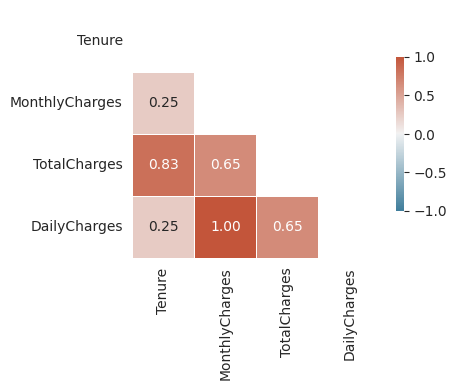

In [22]:
# @title Correlação

# Remover variáveis categóricas antes de calcular a correlação
corr = df_valid.drop(columns=variaveis_qualitativas).corr(numeric_only=True)

# Gerar uma máscara para o triângulo
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

# Configurar a figura
f, ax = plt.subplots(figsize=(4, 4))

# Gerar um mapa de calor divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Faz o mapa de calor com a máscara e a proporção correta
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f"
)
plt.show();

## Conclusões e Insights

---

###  Distribuições com Média e Mediana (Informações Gerais)

####  Tenure (Tempo de permanência)
- Distribuição **assimétrica à esquerda** (negativamente inclinada).
- **Mediana ≈ 29 meses**, **Média ≈ 32 meses**.
- Indica que **muitos clientes cancelam nos primeiros meses**, sugerindo **dificuldade na retenção de novos clientes**.


####  MonthlyCharges (Cobrança mensal)
- Indica problemas na arrecadação:  
  <p><b>Maior frequência de clientes com plano básico.</p></b>


####  TotalCharges (Cobrança total)
- Distribuição **altamente assimétrica à direita**.
- Muitos clientes com **baixo total pago (novos ou de curta permanência)**.
- **Clientes antigos acumulam faturas significativamente maiores**.

---

###  Variaveis Qualitativas
#### Serviços
<p> Indices de churn relacionados com os serviços ofertados:</p>

- InternetService: detectados 1297 usuarios que possuem a fibra optica em churn.

- OnlinesSecurity: detectados 1461 usuarios em churn que não possuem esse serviço.

- OnlineBackup: detectados 1233 usuarios em churn que não possuem esse serviço.

- DeviceProtection: detectados 1211 usuarios em churn que não possuem esse serviço.

- TechSupport: detectados 1446 usuarios em churn que não possuem esse serviço.

---
###  Correlação (Mapa de calor)

| Variáveis         | Correlação com `TotalCharges` |
|-------------------|-------------------------------|
| `Tenure`          | **0.83 (alta)**               |
| `MonthlyCharges`  | **0.65 (moderada)**           |
| `DailyCharges`    | **0.65 (moderada)**           |

- `TotalCharges` tem **forte correlação com `Tenure`**, reforçando que **quanto mais tempo de contrato, maior o valor acumulado**..

---




##  Recomendações e Ações Possíveis

- **Foco em retenção** de clientes com `Tenure` baixo.
- **Segmentação de planos** com base em `MonthlyCharges` (básico vs premium).
- Usar `TotalCharges` como **indicador de valor do cliente (CLV)** para campanhas e estratégias de fidelização.

---

# Salvando os dados

In [141]:
dados_finais_telecomX = df_valid.copy()
dados_finais_telecomX.to_csv('dados_finais_telecomX.csv', index=False)